In [136]:
import pandas as pd
import numpy as np
import os

In [137]:
df = pd.read_csv("../data/Shark Tank Companies (2) (1).csv")
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [138]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

deal                      0
description               0
episode                   0
category                  0
entrepreneurs             0
location                  0
website                   0
askedFor                  0
exchangeForStake          0
valuation                 0
season                    0
shark1                    0
shark2                    0
shark3                    0
shark4                    0
shark5                    0
title                     0
episode-season            0
Multiple Entreprenuers    0
dtype: int64

## Pick out the Deal (Dependent Variable) and Description columns into a separate data frame

In [139]:
data = df[["deal","description"]]
display(data)

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...
...,...,...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...


## Create two corpora, one with those who secured a Deal, the other with those who did not secure a deal.
̌

In [140]:
data["deal"]=data["deal"].astype("str")
df_true = pd.DataFrame()
df_false = pd.DataFrame()
grouped=data.groupby(data.deal)
grouped.head()
df_true=grouped.get_group("True")
df_false=grouped.get_group("False")


<ipython-input-140-cad6f1ee33ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["deal"]=data["deal"].astype("str")


In [141]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         387 non-null    object
 1   description  387 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...


In [142]:
df_true.info()
df_true.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         204 non-null    object
 1   description  204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


,deal,description
count,204,204
unique,1,203
top,True,"Echo Valley Meats is a retail, online gift cat..."
freq,204,2


In [143]:
df_true.head()

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
5,True,One of the first entrepreneurs to pitch on Sha...
12,True,A line of books written to help children find ...
16,True,Coverplay is a slipcover for children's play y...


In [144]:
df_true.drop(["deal"],axis=1,inplace=True)
df_true

/opt/homebrew/Caskroom/miniforge/base/envs/data-science/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,description
1,Retail and wholesale pie factory with two reta...
2,Ava the Elephant is a godsend for frazzled par...
5,One of the first entrepreneurs to pitch on Sha...
12,A line of books written to help children find ...
16,Coverplay is a slipcover for children's play y...
...,...
489,SynDaver Labs makes synthetic body parts for u...
490,Zoom Interiors is a virtual service for interi...
491,Spikeball started out as a casual outdoors gam...
492,Shark Wheel is out to literally reinvent the w...


In [145]:
df_true["chars"]=df_true["description"].str.len()
df_false["chars"]=df_false["description"].str.len()
sum_true=df_true["chars"].sum()
sum_false=df_false["chars"].sum()
print("True Corpus",sum_true)
print("False Corpus",sum_false)

True Corpus 50302
False Corpus 34899


<ipython-input-145-60719cea69ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true["chars"]=df_true["description"].str.len()
<ipython-input-145-60719cea69ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false["chars"]=df_false["description"].str.len()


In [146]:
df_true=df_true.astype("str")
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  204 non-null    object
 1   chars        204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [147]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(stopwords.words('english'))
print("True: ")
nsw_true=[]
for x in df_true["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    for i in tokens_without_sw:
        nsw_true.append(i)
    print(tokens_without_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [148]:
nsw_false=[]
print("False:")
tokens_without_sw_freq=[]
for x in df_false["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    print(tokens_without_sw)
    for i in tokens_without_sw:
        nsw_false.append(i)
    print(tokens_without_sw)

False:
['Organizing', 'packing', 'moving', 'services', 'delivered', 'college', 'women']
['Organizing', 'packing', 'moving', 'services', 'delivered', 'college', 'women']
['Interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information']
['Interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information']
['mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', '/', 'streetwear', 'apparel']
['mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', '/', 'streetwear', 'apparel']
['Attach', 'Noted', 'detachable', '``', 'arm', "''", 'holds', 'Post-It', 'notes', 'side', 'laptop', 'screen']
['Attach', 'Noted', 'detachable', '``', 'arm', "''", 'holds', 'Post-It', 'notes', 'side', 'laptop', 'screen']
['safety', 'device', 'seatbelts', 'It', '

In [149]:
print(stopwords.words('english'))
print(nsw_false)
print(nsw_true)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [150]:
freq = nltk.FreqDist(nsw_false)
freq_false=freq.most_common(3)
print(freq_false)
freq = nltk.FreqDist(nsw_true)
freq_true=freq.most_common(3)
print(freq_true)

[('product', 12), ('system', 12), ('online', 12)]
[('You', 18), ('children', 16), ('easy', 16)]


In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [152]:
comment_words = ''
val=''
type(nsw_true)
comment_words_true=' '.join(nsw_true)
comment_words_false=' '.join(nsw_false)
print(comment_words)

## word cloud true

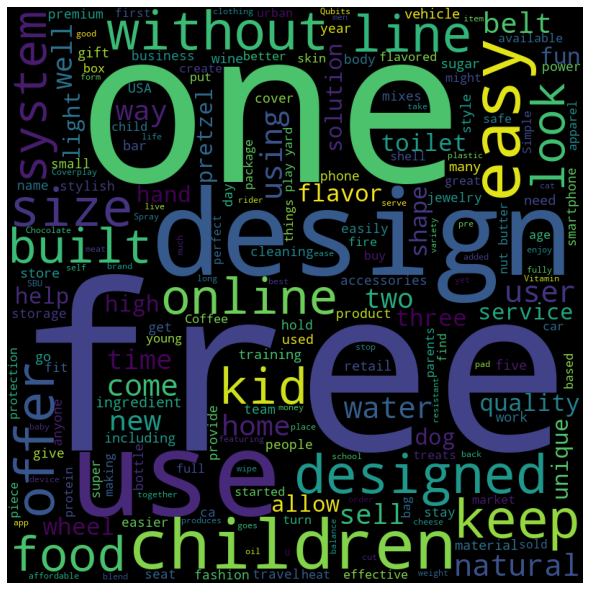

In [155]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_true)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## word cloud false

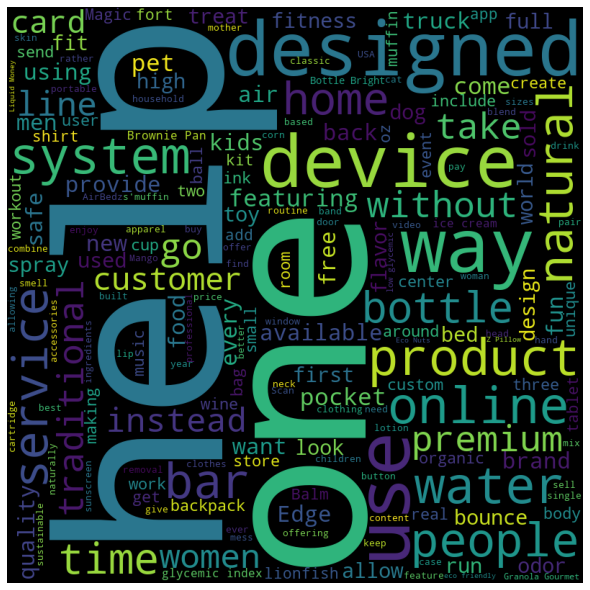

In [156]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_false)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
